# B2B COURIER CHARGES ACCURACY ANALYSIS
## BUSINESS PROBLEM

- In today’s fast-paced e-commerce industry, fast and efficient order delivery is crucial to business success. To ensure seamless order fulfilment, businesses often partner with courier companies to ship their products to customers. However, managing the charges collected by these courier companies can be difficult, especially when dealing with a high volume of orders. It is one of the real-time problems B2B businesses experience when their estimated charges for the same invoice don’t match.

- B2B courier charges accuracy analysis focuses on assessing the accuracy of fees charged by courier companies for the delivery of goods in B2B transactions. The aim is to ensure that companies are billed appropriately for the services provided by courier companies.

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
order_report = pd.read_csv('Order Report.csv')
sku_master = pd.read_csv('SKU Master.csv')
pincode_mapping = pd.read_csv('pincodes.csv')
courier_invoice = pd.read_csv('Invoice.csv')
courier_company_rates = pd.read_csv('Courier Company - Rates.csv')

In [83]:
order_report.head()

,ExternOrderNo,SKU,Order Qty,Unnamed: 3,Unnamed: 4
0,2001827036,8904223818706,1.0,NaN,NaN
1,2001827036,8904223819093,1.0,NaN,NaN
2,2001827036,8904223819109,1.0,NaN,NaN
3,2001827036,8904223818430,1.0,NaN,NaN
4,2001827036,8904223819277,1.0,NaN,NaN


In [84]:
sku_master.head()

,SKU,Weight (g),Unnamed: 2,Unnamed: 3,Unnamed: 4
0,8904223815682,210,NaN,NaN,NaN
1,8904223815859,165,NaN,NaN,NaN
2,8904223815866,113,NaN,NaN,NaN
3,8904223815873,65,NaN,NaN,NaN
4,8904223816214,120,NaN,NaN,NaN


In [85]:
pincode_mapping.head()

,Warehouse Pincode,Customer Pincode,Zone,Unnamed: 3,Unnamed: 4
0,121003,507101,d,NaN,NaN
1,121003,486886,d,NaN,NaN
2,121003,532484,d,NaN,NaN
3,121003,143001,b,NaN,NaN
4,121003,515591,d,NaN,NaN


In [86]:
courier_invoice.head()

,AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.)
0,1091117222124,2001806232,1.30,121003,507101,d,Forward charges,135.0
1,1091117222194,2001806273,1.00,121003,486886,d,Forward charges,90.2
2,1091117222931,2001806408,2.50,121003,532484,d,Forward charges,224.6
3,1091117223244,2001806458,1.00,121003,143001,b,Forward charges,61.3
4,1091117229345,2001807012,0.15,121003,515591,d,Forward charges,45.4


In [87]:
courier_company_rates.head()

,fwd_a_fixed,fwd_a_additional,fwd_b_fixed,fwd_b_additional,fwd_c_fixed,fwd_c_additional,fwd_d_fixed,fwd_d_additional,fwd_e_fixed,fwd_e_additional,rto_a_fixed,rto_a_additional,rto_b_fixed,rto_b_additional,rto_c_fixed,rto_c_additional,rto_d_fixed,rto_d_additional,rto_e_fixed,rto_e_additional
0,29.5,23.6,33,28.3,40.1,38.9,45.4,44.8,56.6,55.5,13.6,23.6,20.5,28.3,31.9,38.9,41.3,44.8,50.7,55.5


## DATA CLEANING

In [88]:
def missing_to_df(df):
    #Number and percentage of missing data in training data set for each column
    total_missing_df = df.isnull().sum().sort_values(ascending =False)
    percent_missing_df = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
    missing_data_df = pd.concat([total_missing_df, percent_missing_df], axis=1, keys=['Total', 'Percent'])
    return missing_data_df

In [89]:
missing_df = missing_to_df(order_report)
missing_df[missing_df['Total'] > 0]

,Total,Percent
Unnamed: 3,400,100.0
Unnamed: 4,400,100.0


In [90]:
missing_df = missing_to_df(sku_master)
missing_df[missing_df['Total'] > 0]

,Total,Percent
Unnamed: 2,66,100.0
Unnamed: 3,66,100.0
Unnamed: 4,66,100.0


In [91]:
missing_df = missing_to_df(pincode_mapping)
missing_df[missing_df['Total'] > 0]

,Total,Percent
Unnamed: 3,124,100.0
Unnamed: 4,124,100.0


In [92]:
missing_df = missing_to_df(courier_invoice)
missing_df[missing_df['Total'] > 0]

,Total,Percent


In [93]:
missing_df = missing_to_df(courier_company_rates)
missing_df[missing_df['Total'] > 0]

,Total,Percent


In [94]:
order_report = order_report.drop(columns=["Unnamed: 3","Unnamed: 4"])
sku_master = sku_master.drop(columns=["Unnamed: 3","Unnamed: 4","Unnamed: 2"])
pincode_mapping = pincode_mapping.drop(columns=["Unnamed: 3","Unnamed: 4"])

In [95]:
order_report.head()

,ExternOrderNo,SKU,Order Qty
0,2001827036,8904223818706,1.0
1,2001827036,8904223819093,1.0
2,2001827036,8904223819109,1.0
3,2001827036,8904223818430,1.0
4,2001827036,8904223819277,1.0


In [96]:
sku_master.head()

,SKU,Weight (g)
0,8904223815682,210
1,8904223815859,165
2,8904223815866,113
3,8904223815873,65
4,8904223816214,120


In [97]:
pincode_mapping.head()

,Warehouse Pincode,Customer Pincode,Zone
0,121003,507101,d
1,121003,486886,d
2,121003,532484,d
3,121003,143001,b
4,121003,515591,d


In [98]:
merged_data = pd.merge(order_report,sku_master,on="SKU")
merged_data.head()

,ExternOrderNo,SKU,Order Qty,Weight (g)
0,2001827036,8904223818706,1.0,127
1,2001821995,8904223818706,1.0,127
2,2001819252,8904223818706,1.0,127
3,2001816996,8904223818706,1.0,127
4,2001814580,8904223818706,1.0,127


In [99]:
merged_data = merged_data.rename(columns={"ExternOrderNo":"Order ID"})

In [100]:
merged_data.head()

,Order ID,SKU,Order Qty,Weight (g)
0,2001827036,8904223818706,1.0,127
1,2001821995,8904223818706,1.0,127
2,2001819252,8904223818706,1.0,127
3,2001816996,8904223818706,1.0,127
4,2001814580,8904223818706,1.0,127


In [101]:
#merging the courier invoice and pincode mapping dataset
abc_courier = pincode_mapping.drop_duplicates(subset=["Customer Pincode"])
courier_abc= courier_invoice[['Order ID', 'Customer Pincode','Type of Shipment']]
pincodes = courier_abc.merge(abc_courier,on='Customer Pincode')


In [102]:
pincodes.head()

,Order ID,Customer Pincode,Type of Shipment,Warehouse Pincode,Zone
0,2001806232,507101,Forward charges,121003,d
1,2001806273,486886,Forward charges,121003,d
2,2001806408,532484,Forward charges,121003,d
3,2001806458,143001,Forward charges,121003,b
4,2001807012,515591,Forward charges,121003,d


In [103]:
data = merged_data.merge(pincodes,on="Order ID")

In [104]:
data.head()

,Order ID,SKU,Order Qty,Weight (g),Customer Pincode,Type of Shipment,Warehouse Pincode,Zone
0,2001827036,8904223818706,1.0,127,173213,Forward charges,121003,e
1,2001827036,8904223819093,1.0,150,173213,Forward charges,121003,e
2,2001827036,8904223819109,1.0,100,173213,Forward charges,121003,e
3,2001827036,8904223818430,1.0,165,173213,Forward charges,121003,e
4,2001827036,8904223819277,1.0,350,173213,Forward charges,121003,e


In [105]:
data["Weight (kg)"] = data["Weight (g)"] / 1000

In [106]:
#calculate the weight slabs
def weight_slab(weight):
    i = round(weight % 1, 1)
    if i == 0.0:
        return weight
    elif i > 0.5:
        return int(weight) + 1.0
    else:
        return int(weight) + 0.5

In [107]:
data["Weight (kg)"] = data["Weight (kg)"].apply(weight_slab)

In [108]:
data.head()

,Order ID,SKU,Order Qty,Weight (g),Customer Pincode,Type of Shipment,Warehouse Pincode,Zone,Weight (kg)
0,2001827036,8904223818706,1.0,127,173213,Forward charges,121003,e,0.5
1,2001827036,8904223819093,1.0,150,173213,Forward charges,121003,e,0.5
2,2001827036,8904223819109,1.0,100,173213,Forward charges,121003,e,0.5
3,2001827036,8904223818430,1.0,165,173213,Forward charges,121003,e,0.5
4,2001827036,8904223819277,1.0,350,173213,Forward charges,121003,e,0.5


In [109]:
courier_invoice = courier_invoice.rename(columns={'Zone': 'Delivery Zone Charged by Courier Company'})
data = data.rename(columns={'Zone': 'Delivery Zone As Per ABC'})
data = data.rename(columns={'Weight (kg)': 'Weight Slab As Per ABC'})

In [110]:
courier_invoice.head()

,AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Delivery Zone Charged by Courier Company,Type of Shipment,Billing Amount (Rs.)
0,1091117222124,2001806232,1.30,121003,507101,d,Forward charges,135.0
1,1091117222194,2001806273,1.00,121003,486886,d,Forward charges,90.2
2,1091117222931,2001806408,2.50,121003,532484,d,Forward charges,224.6
3,1091117223244,2001806458,1.00,121003,143001,b,Forward charges,61.3
4,1091117229345,2001807012,0.15,121003,515591,d,Forward charges,45.4


In [111]:
data.head()

,Order ID,SKU,Order Qty,Weight (g),Customer Pincode,Type of Shipment,Warehouse Pincode,Delivery Zone As Per ABC,Weight Slab As Per ABC
0,2001827036,8904223818706,1.0,127,173213,Forward charges,121003,e,0.5
1,2001827036,8904223819093,1.0,150,173213,Forward charges,121003,e,0.5
2,2001827036,8904223819109,1.0,100,173213,Forward charges,121003,e,0.5
3,2001827036,8904223818430,1.0,165,173213,Forward charges,121003,e,0.5
4,2001827036,8904223819277,1.0,350,173213,Forward charges,121003,e,0.5


In [112]:
# calculate the expected charges

total_expected_charge = []

for _, row in data.iterrows():
    fwd_category = 'fwd_' + row['Delivery Zone As Per ABC']
    fwd_fixed = courier_company_rates.at[0, fwd_category + '_fixed']
    fwd_additional = courier_company_rates.at[0, fwd_category + '_additional']
    rto_category = 'rto_' + row['Delivery Zone As Per ABC']
    rto_fixed = courier_company_rates.at[0, rto_category + '_fixed']
    rto_additional = courier_company_rates.at[0, rto_category + '_additional']

    weight_slab = row['Weight Slab As Per ABC']

    if row['Type of Shipment'] == 'Forward charges':
        additional_weight = max(0, (weight_slab - 0.5) / 0.5)
        total_expected_charge.append(fwd_fixed + additional_weight * fwd_additional)
    elif row['Type of Shipment'] == 'Forward and RTO charges':
        additional_weight = max(0, (weight_slab - 0.5) / 0.5)
        total_expected_charge.append(fwd_fixed + additional_weight * (fwd_additional + rto_additional))
    else:
        total_expected_charge.append(0)

data['Expected Charge as per ABC'] = total_expected_charge
print(data.head())

     Order ID            SKU  Order Qty  Weight (g)  Customer Pincode  \
0  2001827036  8904223818706        1.0         127            173213   
1  2001827036  8904223819093        1.0         150            173213   
2  2001827036  8904223819109        1.0         100            173213   
3  2001827036  8904223818430        1.0         165            173213   
4  2001827036  8904223819277        1.0         350            173213   

  Type of Shipment  Warehouse Pincode Delivery Zone As Per ABC  \
0  Forward charges             121003                        e   
1  Forward charges             121003                        e   
2  Forward charges             121003                        e   
3  Forward charges             121003                        e   
4  Forward charges             121003                        e   

   Weight Slab As Per ABC  Expected Charge as per ABC  
0                     0.5                        56.6  
1                     0.5                        56.

In [117]:
merged_output = data.merge(courier_invoice, on='Order ID')
print(merged_output.head())

     Order ID            SKU  Order Qty  Weight (g)  Customer Pincode_x  \
0  2001827036  8904223818706        1.0         127              173213   
1  2001827036  8904223819093        1.0         150              173213   
2  2001827036  8904223819109        1.0         100              173213   
3  2001827036  8904223818430        1.0         165              173213   
4  2001827036  8904223819277        1.0         350              173213   

  Type of Shipment_x  Warehouse Pincode_x Delivery Zone As Per ABC  \
0    Forward charges               121003                        e   
1    Forward charges               121003                        e   
2    Forward charges               121003                        e   
3    Forward charges               121003                        e   
4    Forward charges               121003                        e   

   Weight Slab As Per ABC  Expected Charge as per ABC       AWB Code  \
0                     0.5                        56.6  1

In [114]:
df_diff = merged_output
df_diff['Difference (Rs.)'] = df_diff['Billing Amount (Rs.)'] - df_diff['Expected Charge as per ABC']

df_new = df_diff[['Order ID', 'Difference (Rs.)', 'Expected Charge as per ABC']]

print(df_new.head())

     Order ID  Difference (Rs.)  Expected Charge as per ABC
0  2001827036              61.3                        56.6
1  2001827036              61.3                        56.6
2  2001827036              61.3                        56.6
3  2001827036              61.3                        56.6
4  2001827036              61.3                        56.6


In [115]:
# Calculate the total orders in each category
total_correctly_charged = len(df_new[df_new['Difference (Rs.)'] == 0])
total_overcharged = len(df_new[df_new['Difference (Rs.)'] > 0])
total_undercharged = len(df_new[df_new['Difference (Rs.)'] < 0])

# Calculate the total amount in each category
amount_overcharged = abs(df_new[df_new['Difference (Rs.)'] > 0]['Difference (Rs.)'].sum())
amount_undercharged = df_new[df_new['Difference (Rs.)'] < 0]['Difference (Rs.)'].sum()
amount_correctly_charged = df_new[df_new['Difference (Rs.)'] == 0]['Expected Charge as per ABC'].sum()

# Create a new DataFrame for the summary
summary_data = {'Description': ['Total Orders where ABC has been correctly charged',
                                'Total Orders where ABC has been overcharged',
                                'Total Orders where ABC has been undercharged'],
                'Count': [total_correctly_charged, total_overcharged, total_undercharged],
                'Amount (Rs.)': [amount_correctly_charged, amount_overcharged, amount_undercharged]}

df_summary = pd.DataFrame(summary_data)

print(df_summary)

                                         Description  Count  Amount (Rs.)
0  Total Orders where ABC has been correctly charged     12         507.6
1        Total Orders where ABC has been overcharged    382       33750.5
2       Total Orders where ABC has been undercharged      7        -165.2


In [116]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Pie(labels=df_summary['Description'],
                            values=df_summary['Count'],
                            textinfo='label+percent',
                            hole=0.4))
fig.update_layout(title='Proportion')

fig.show()

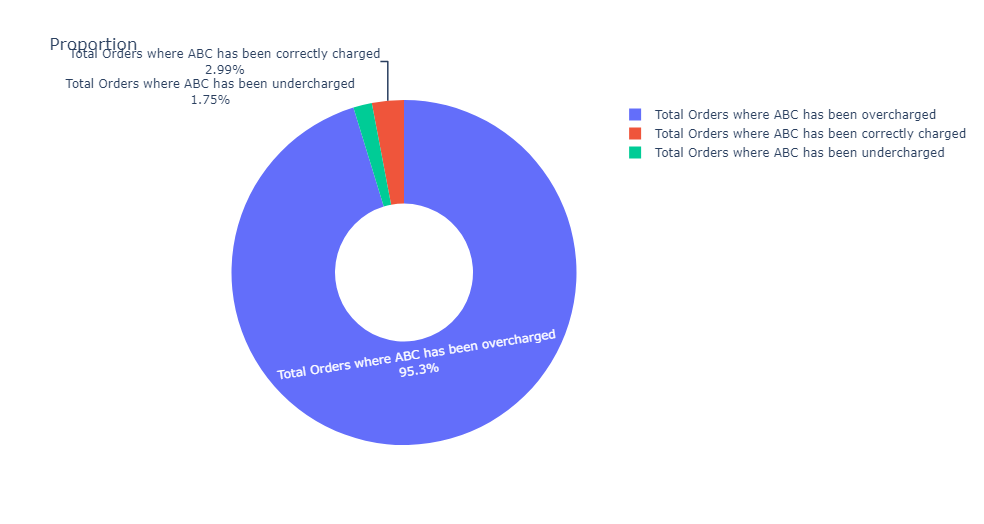